# E-commerce Customer Segmentation

# Problem Statement:

# Given the e-commerce data, use k-means clustering algorithm to cluster

# customers with similar interest.

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np

In [2]:
#Importing data
df=pd.read_csv(r"E:\\PROJECTS - AI&ML//cust_data.csv")
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Required preprocessing of data
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
df.tail()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999,30000,F,3,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [7]:
df.isnull()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [8]:
# replacing nan values in gender with No gender 
df["Gender"].fillna("NoGender", inplace = True)
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NoGender,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(30000, 38)

In [13]:
df.Gender.value_counts()

Gender
F           22054
M            5222
NoGender     2724
Name: count, dtype: int64

# OBSERVATIONS:

# In Data Female count is more when compare to male count

# No Gender also 2724 out of 30000 so this number indicates Error in data.

# Which means either Male nor Female indicating that records.

C:\DON\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\DON\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\DON\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Gender')

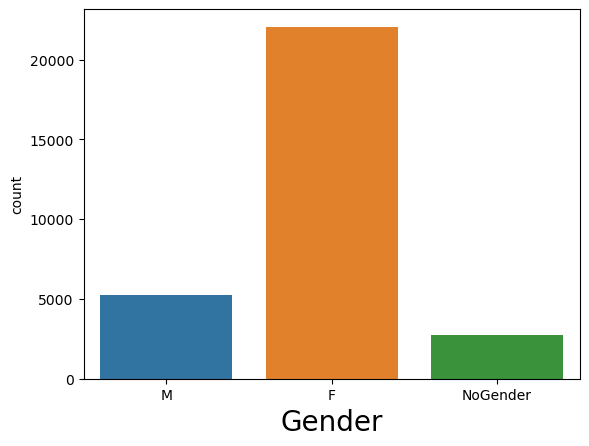

In [14]:
import seaborn as sns
Gender = sns.countplot(data = df, x = 'Gender')
Gender.set_xlabel('Gender', fontsize=20)

In [15]:
df2=pd.DataFrame(df, columns=['Gender','Orders'])
df2

,Gender,Orders
0,M,7
1,F,0
2,M,7
3,F,0
4,NoGender,10
...,...,...
29995,M,0
29996,M,1
29997,M,0
29998,M,0


C:\DON\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\DON\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\DON\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


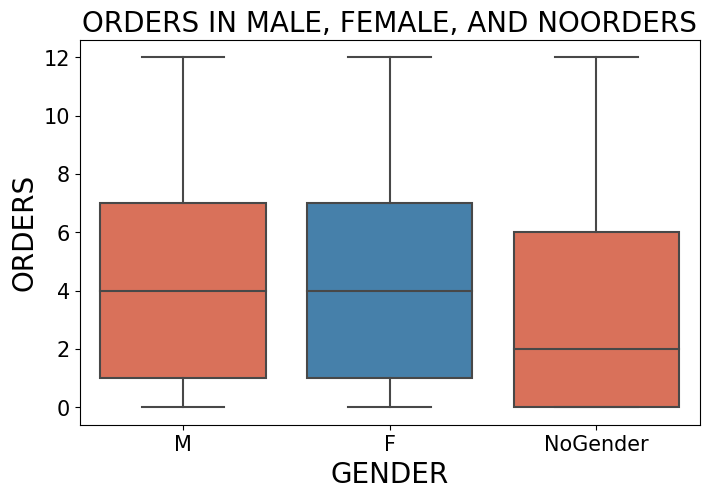

In [16]:
import matplotlib.pyplot as plt
pa_color = ['#ee6445','#3682ba']
plt.figure(figsize=(8,5))
sns.boxplot(y=df2['Orders'], x=df2['Gender'], palette=pa_color)
plt.title('ORDERS IN MALE, FEMALE, AND NOORDERS', fontsize=20)
plt.xlabel('GENDER', fontsize=20)
plt.ylabel('ORDERS', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# OBSERVATIONS:

# From graph Male and Female have approximately equal orders.

# NoGender little difference when compare to Male and Female

# CLUSTER ANALYSIS

# To do clusters, Need to select all data.

# With help of all data we can able to group best segmentation(Saparation).

In [17]:
df.Gender[df.Gender == 'M'] = 1
df.Gender[df.Gender == 'F'] = 0
df.Gender[df.Gender == 'NoGender'] = 2
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

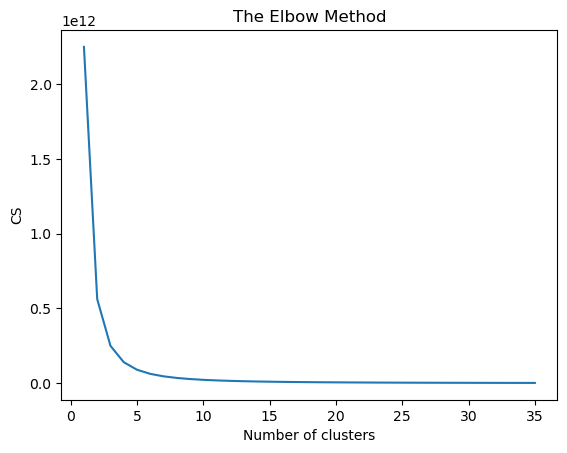

In [19]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 36):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 36), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [42]:
df1=df.drop(columns=["Cust_ID","Gender","Orders"])

In [43]:
X=df1
Y=df["Gender"]
#X=df.iloc[:, 3:].values
#Y=df.iloc[:,1].values

In [44]:
X.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [45]:
Y.head()

0    1
1    0
2    1
3    0
4    2
Name: Gender, dtype: int32

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Jordan                  30000 non-null  int64
 1   Gatorade                30000 non-null  int64
 2   Samsung                 30000 non-null  int64
 3   Asus                    30000 non-null  int64
 4   Udis                    30000 non-null  int64
 5   Mondelez International  30000 non-null  int64
 6   Wrangler                30000 non-null  int64
 7   Vans                    30000 non-null  int64
 8   Fila                    30000 non-null  int64
 9   Brooks                  30000 non-null  int64
 10  H&M                     30000 non-null  int64
 11  Dairy Queen             30000 non-null  int64
 12  Fendi                   30000 non-null  int64
 13  Hewlett Packard         30000 non-null  int64
 14  Pladis                  30000 non-null  int64
 15  Asics              

In [48]:
cols = X.columns

In [49]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [50]:
X = pd.DataFrame(X, columns=[cols])

In [51]:
X.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
1,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
2,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625


# CLUSTER SEGMENTATION (SEPARATION)  1

In [52]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2, random_state=0) 
kmeans1.fit(X)

C:\DON\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [54]:
kmeans1.cluster_centers_

array([[0.0196424 , 0.02851809, 0.0125388 , 0.01663145, 0.01957457,
        0.00841027, 0.03961203, 0.00928206, 0.00856186, 0.01860435,
        0.04213338, 0.00408442, 0.01301446, 0.02929703, 0.01120866,
        0.00596638, 0.00375715, 0.01721526, 0.02041605, 0.00768343,
        0.0099152 , 0.00433243, 0.00224727, 0.0290992 , 0.03463371,
        0.01224818, 0.06556586, 0.13076302, 0.08792005, 0.02793872,
        0.02300599, 0.01327294, 0.01249793, 0.0236095 , 0.00872683],
       [0.00937005, 0.0143824 , 0.00736354, 0.00800049, 0.00830772,
        0.00369469, 0.00609674, 0.00648115, 0.00580936, 0.01023286,
        0.01324766, 0.00136728, 0.00678386, 0.01335912, 0.00259385,
        0.00425331, 0.00449748, 0.01066279, 0.0100084 , 0.00560038,
        0.00501846, 0.00388097, 0.00304349, 0.00791146, 0.00906902,
        0.00396719, 0.01363038, 0.01338256, 0.00567541, 0.00460165,
        0.0038625 , 0.00779001, 0.00743868, 0.00837463, 0.00353517]])

In [55]:
kmeans1.inertia_

1449.0979884095182

In [56]:
labels = kmeans1.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(Y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))

Result: 9559 out of 30000 samples were correctly labeled.


In [57]:
print('Accuracy score of Separation 1: {0:0.2f}'. format(correct_labels/float(Y.size)))

Accuracy score of Separation 1: 0.32


In [58]:
from sklearn.metrics import silhouette_score
print("silhouette_score - Separation 1: ", silhouette_score(X, labels))

silhouette_score - Separation 1:  0.34594427501375563


In [59]:
sep1 = X.copy(deep=True)
sep1['cluster'] =labels
sep1.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,1
1,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0
2,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000,1
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,1
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625,0


In [60]:
sep1.cluster.value_counts()

(cluster,)
1             24818
0              5182
Name: count, dtype: int64

# CLUSTER SEGMENTATION (SEPARATION)  2

In [86]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=3, random_state=0) 
kmeans2.fit(X)

C:\DON\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [87]:
kmeans2.cluster_centers_

array([[0.00938986, 0.01440957, 0.00739382, 0.00798302, 0.00830179,
        0.00371106, 0.0035195 , 0.00648695, 0.00585677, 0.01034108,
        0.01327626, 0.0013621 , 0.00679667, 0.01356298, 0.00256985,
        0.00425391, 0.00450654, 0.01069481, 0.01002465, 0.00560203,
        0.00501612, 0.00391493, 0.00305748, 0.00792631, 0.00898673,
        0.00398867, 0.01332382, 0.01350851, 0.00559009, 0.0046519 ,
        0.00394925, 0.00776971, 0.00745443, 0.00827558, 0.00354158],
       [0.0182829 , 0.03759743, 0.00988334, 0.01391698, 0.01473767,
        0.00625638, 0.31911967, 0.01151994, 0.00513526, 0.01375516,
        0.03293596, 0.00278723, 0.01138621, 0.02503439, 0.00751243,
        0.00402234, 0.0021258 , 0.01175636, 0.0174232 , 0.00776557,
        0.0086595 , 0.00389729, 0.00250094, 0.01847652, 0.01788171,
        0.01563744, 0.03668042, 0.06514943, 0.02888583, 0.02399511,
        0.01994498, 0.00881581, 0.0090391 , 0.01289546, 0.00515818],
       [0.01911589, 0.02611568, 0.01247062, 0.

In [88]:
kmeans2.inertia_

1384.278572252511

In [89]:
labels1 = kmeans2.labels_

# check how many of the samples were correctly labeled
correct_labels1 = sum(Y == labels1)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels1, Y.size))

Result: 17590 out of 30000 samples were correctly labeled.


In [90]:
print('Accuracy score of Separation 2: {0:0.2f}'. format(correct_labels1/float(Y.size)))

Accuracy score of Separation 2: 0.59


In [91]:
from sklearn.metrics import silhouette_score
print("silhouette_score - Separation 2: ", silhouette_score(X, labels1))

silhouette_score - Separation 2:  0.3396376212921419


In [92]:
sep2 = X.copy(deep=True)
sep2['cluster'] =labels1
sep2.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0
1,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,2
2,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000,0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625,2


In [93]:
sep2.cluster.value_counts()

(cluster,)
0             24524
2              4749
1               727
Name: count, dtype: int64

# CLUSTER SEGMENTATION (SEPARATION)  3

In [94]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=4, random_state=0) 
kmeans3.fit(X)

C:\DON\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [95]:
kmeans3.cluster_centers_

array([[0.00948683, 0.01450073, 0.00745991, 0.00798784, 0.00836535,
        0.00373083, 0.00351145, 0.00654576, 0.00588979, 0.01041276,
        0.01333936, 0.00137037, 0.0067079 , 0.00602877, 0.00262504,
        0.00427982, 0.00457862, 0.01077627, 0.01008964, 0.00563696,
        0.00504956, 0.00397054, 0.00313833, 0.00799373, 0.00908901,
        0.00402664, 0.01364742, 0.01366763, 0.00570148, 0.00475297,
        0.00401814, 0.00786855, 0.00753745, 0.00833333, 0.00361163],
       [0.01165087, 0.0178515 , 0.00807443, 0.00947867, 0.01117129,
        0.00451001, 0.00987362, 0.0068128 , 0.00552923, 0.0114534 ,
        0.02777778, 0.00288933, 0.01441548, 0.30995261, 0.00478491,
        0.00409306, 0.00193882, 0.01123741, 0.01591063, 0.00595417,
        0.00525097, 0.00339652, 0.00183111, 0.01626745, 0.01395471,
        0.00760788, 0.0300158 , 0.02951314, 0.02354858, 0.0114534 ,
        0.00947867, 0.00867083, 0.00753216, 0.01495853, 0.00407287],
       [0.01882806, 0.02590681, 0.01233183, 0.

In [96]:
kmeans3.inertia_

1313.5041711380854

In [97]:
labels2 = kmeans3.labels_

# check how many of the samples were correctly labeled
correct_labels2 = sum(Y == labels2)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels2, Y.size))

Result: 17269 out of 30000 samples were correctly labeled.


In [98]:
print('Accuracy score of Separation 3: {0:0.2f}'. format(correct_labels2/float(Y.size)))

Accuracy score of Separation 3: 0.58


In [99]:
from sklearn.metrics import silhouette_score
print("silhouette_score - Separation 3: ", silhouette_score(X, labels2))

silhouette_score - Separation 3:  0.3425874508121993


In [102]:
sep3 = X.copy(deep=True)
sep3['cluster'] =labels2
sep3.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0
1,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,2
2,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000,0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625,2


In [103]:
sep3.cluster.value_counts()

(cluster,)
0             23980
2              4462
1               844
3               714
Name: count, dtype: int64

# CLUSTER SEGMENTATION (SEPARATION)

# (cluster 1,)  

# 1             24818

# 0              5182

# Accuracy score of Separation 1: 0.32

# silhouette_score - Separation 1:  0.34594427501375563


# (cluster 2,)

# 0             24524

# 2              4749

# 1               727

# Accuracy score of Separation 2: 0.59

# silhouette_score - Separation 2:  0.3396376212921419


# (cluster 3,)

# 0             23980

# 2              4462

# 1               844

# 3               714

# Accuracy score of Separation 3: 0.58

# silhouette_score - Separation 3:  0.3425874508121993


# Conclustion

# Comparing all segmentations of accuracy and silhouette_score 

# Best clusters is 3 according to data
